# Nobel Prize Winners
 A Visual History of Nobel Prize Winners

The dataset is from The Nobel Foundation on Kaggle. It contains information about all prize winners from the start of the prize, in 1901, to 2016.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('datasets/nobel.csv')

nobel.head(7)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany


# USA dominance, visualized

In [6]:
print("The total number of prizes: ", len(nobel))
print('')
print("The amount of prizes by country of birth (top 10): ")

nobel['birth_country'].value_counts().head(10)

The total number of prizes:  911

The amount of prizes by country of birth (top 10): 


United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

When did the USA start to dominate the Nobel Prize charts?

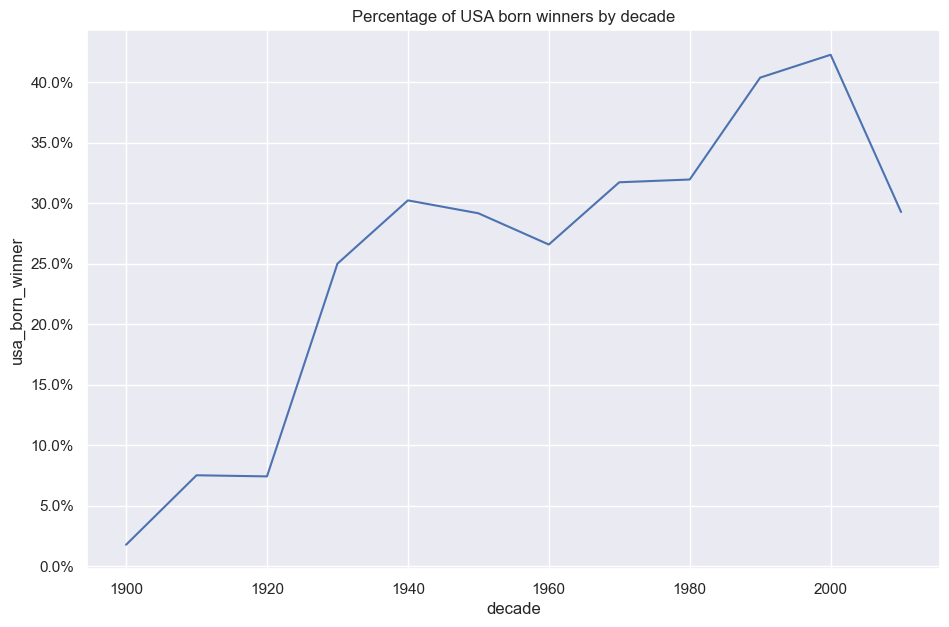

In [18]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = (nobel['birth_country'] == 'United States of America')

nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Plotting USA born winners 
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
plt.title("Percentage of USA born winners by decade")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1))


# Female Nobel Prize winners

In [21]:
print('The number of prizes won by male and female recipients:')
display(nobel['sex'].value_counts())

The number of prizes won by male and female recipients:


Male      836
Female     49
Name: sex, dtype: int64

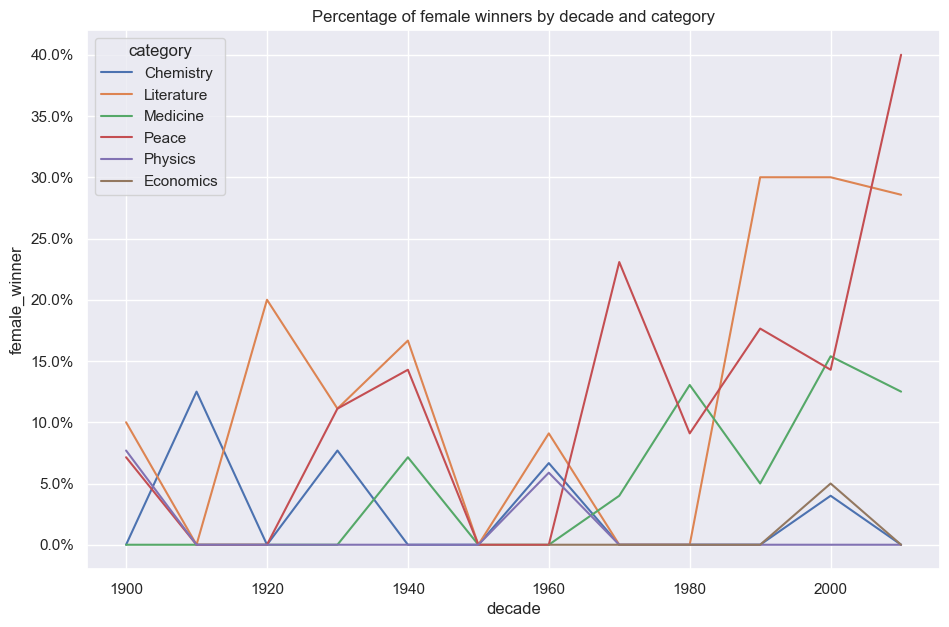

In [23]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = (nobel['sex'] == "Female")
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
ax = sns.lineplot(x='decade', y='female_winner', data=prop_female_winners, hue='category')
plt.title("Percentage of female winners by decade and category")
ax.yaxis.set_major_formatter(PercentFormatter(1))

Who was the first woman to receive a Nobel Prize?

In [24]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel['sex'] == "Female"].nsmallest(n=1, columns='year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# Repeat laureates

Who won more than one prize?

In [29]:
nobel.groupby('full_name').filter(lambda x: x.shape[0] > 1).sort_values('full_name')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1980,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1970,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# Age

The average age of Nobel Prize winners is growing:

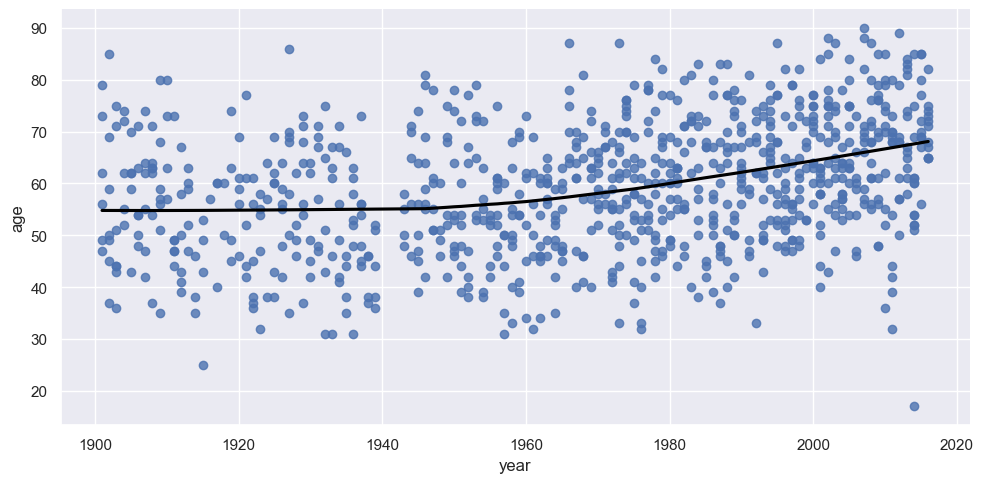

In [31]:
# Calculating the age of Nobel Prize winners
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'})
plt.show()

Let's look at the change of average age in each category separately:

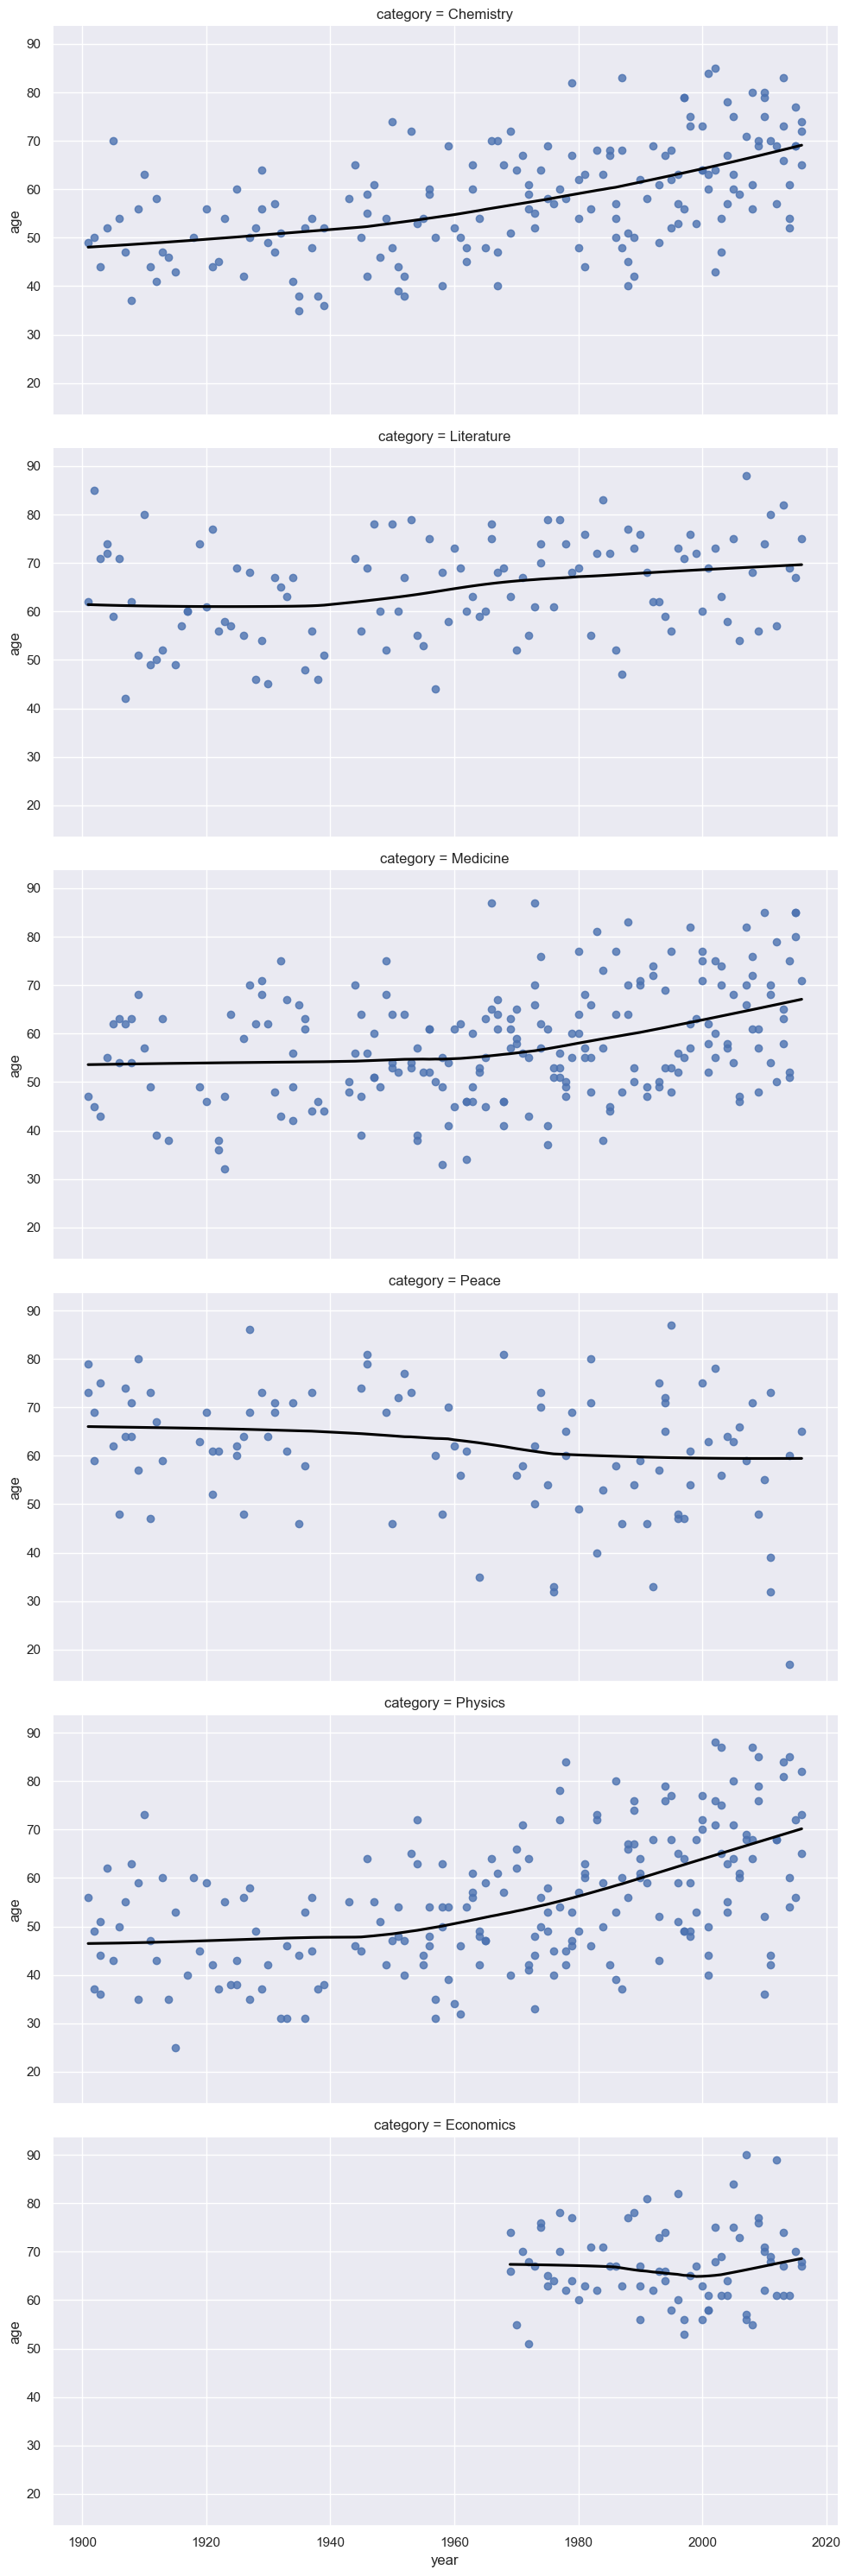

In [35]:
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'},
          row='category')
plt.show()

There is no significant change in Economy, and Peace prize winners tend to be younger nowadays.

Who are the oldest and youngest people ever to have won a Nobel Prize?

In [36]:
display(nobel.nlargest(n=1, columns='age'))
display(nobel.nsmallest(n=1, columns='age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
